In [1]:
import pandas as pd

In [8]:
ipl_data = {
    "Team": [
        "Riders",
        "Riders",
        "Devils",
        "Devils",
        "Kings",
        "Kings",
        "Kings",
        "Kings",
        "Riders",
        "Royals",
        "Royals",
        "Riders",
    ],
    "Rank":[1, 2, 2, 3, 3, 4, 1, 1,2 , 4, 1, 2],
    "Year":[2014, 2015, 2014, 2015, 2014, 2015, 2016, 2017, 2016, 2014, 2015, 2017],
    "Points":[876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690],
}

In [9]:
df = pd.DataFrame(ipl_data)

In [10]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [13]:
df.groupby("Team")["Points"].sum()

Team
Devils    1536
Kings     3097
Riders    3049
Royals    1505
Name: Points, dtype: int64

In [14]:
df.groupby("Team")["Points"].mean()

Team
Devils    768.00
Kings     774.25
Riders    762.25
Royals    752.50
Name: Points, dtype: float64

In [18]:
h_index = df.groupby(["Team", "Year"])["Points"].sum() # Hierarchical index

In [31]:
h_index # 여전히 Series data

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2015    812
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
Name: Points, dtype: int64

In [19]:
h_index.index

MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2015),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015)],
           names=['Team', 'Year'])

In [20]:
h_index["Devils": "Kings"]

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2015    812
        2016    756
        2017    788
Name: Points, dtype: int64

In [21]:
h_index.unstack()

Year,2014,2015,2016,2017
Team,,,,
Devils,863.0,673.0,NaN,NaN
Kings,741.0,812.0,756.0,788.0
Riders,876.0,789.0,694.0,690.0
Royals,701.0,804.0,NaN,NaN


In [22]:
h2_index = df.groupby(["Team", "Year", "Rank"])["Points"].sum() # Hierarchical index
h2_index

Team    Year  Rank
Devils  2014  2       863
        2015  3       673
Kings   2014  3       741
        2015  4       812
        2016  1       756
        2017  1       788
Riders  2014  1       876
        2015  2       789
        2016  2       694
        2017  2       690
Royals  2014  4       701
        2015  1       804
Name: Points, dtype: int64

In [23]:
h2_index.unstack()

Rank             1      2      3      4
Team   Year                            
Devils 2014    NaN  863.0    NaN    NaN
       2015    NaN    NaN  673.0    NaN
Kings  2014    NaN    NaN  741.0    NaN
       2015    NaN    NaN    NaN  812.0
       2016  756.0    NaN    NaN    NaN
       2017  788.0    NaN    NaN    NaN
Riders 2014  876.0    NaN    NaN    NaN
       2015    NaN  789.0    NaN    NaN
       2016    NaN  694.0    NaN    NaN
       2017    NaN  690.0    NaN    NaN
Royals 2014    NaN    NaN    NaN  701.0
       2015  804.0    NaN    NaN    NaN

In [24]:
h_index.reset_index()

,Team,Year,Points
0,Devils,2014,863
1,Devils,2015,673
2,Kings,2014,741
3,Kings,2015,812
4,Kings,2016,756
5,Kings,2017,788
6,Riders,2014,876
7,Riders,2015,789
8,Riders,2016,694
9,Riders,2017,690


In [25]:
h_index.swaplevel()

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2015  Kings     812
2016  Kings     756
2017  Kings     788
2014  Riders    876
2015  Riders    789
2016  Riders    694
2017  Riders    690
2014  Royals    701
2015  Royals    804
Name: Points, dtype: int64

In [26]:
h_index

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2015    812
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
Name: Points, dtype: int64

In [27]:
h_index.swaplevel().reset_index()

,Year,Team,Points
0,2014,Devils,863
1,2015,Devils,673
2,2014,Kings,741
3,2015,Kings,812
4,2016,Kings,756
5,2017,Kings,788
6,2014,Riders,876
7,2015,Riders,789
8,2016,Riders,694
9,2017,Riders,690


In [29]:
h_index.swaplevel().sort_index(level = 1)

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2015  Kings     812
2016  Kings     756
2017  Kings     788
2014  Riders    876
2015  Riders    789
2016  Riders    694
2017  Riders    690
2014  Royals    701
2015  Royals    804
Name: Points, dtype: int64

In [30]:
h_index.sort_values() 

Team    Year
Devils  2015    673
Riders  2017    690
        2016    694
Royals  2014    701
Kings   2014    741
        2016    756
        2017    788
Riders  2015    789
Royals  2015    804
Kings   2015    812
Devils  2014    863
Riders  2014    876
Name: Points, dtype: int64

In [32]:
h_index.std(level=0)

Team
Devils    134.350288
Kings      31.899582
Riders     88.567771
Royals     72.831998
Name: Points, dtype: float64

In [35]:
h_index.sum(level = 0)

Team
Devils    1536
Kings     3097
Riders    3049
Royals    1505
Name: Points, dtype: int64

In [36]:
h_index.sum(level = 1)

Year
2014    3181
2015    3078
2016    1450
2017    1478
Name: Points, dtype: int64

In [47]:
df.sort_values('Team')

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
0,Riders,1,2014,876
1,Riders,2,2015,789
8,Riders,2,2016,694
11,Riders,2,2017,690


In [41]:
grouped = df.groupby("Team")

In [42]:
print(type(grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [43]:
print(list(grouped))

[('Devils',      Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673), ('Kings',     Team  Rank  Year  Points
4  Kings     3  2014     741
5  Kings     4  2015     812
6  Kings     1  2016     756
7  Kings     1  2017     788), ('Riders',       Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690), ('Royals',       Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804)]


In [49]:
for name, group in grouped:
    print(group)

     Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673
    Team  Rank  Year  Points
4  Kings     3  2014     741
5  Kings     4  2015     812
6  Kings     1  2016     756
7  Kings     1  2017     788
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
      Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804


In [50]:
for name, group in grouped:
    print(name)

Devils
Kings
Riders
Royals


In [52]:
type(group)

pandas.core.frame.DataFrame

In [53]:
grouped.get_group("Devils")

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673


In [54]:
grouped.agg(sum)

,Rank,Year,Points
Team,,,
Devils,5,4029,1536
Kings,9,8062,3097
Riders,7,8062,3049
Royals,5,4029,1505


In [55]:
import numpy as np
grouped.agg(np.mean)

,Rank,Year,Points
Team,,,
Devils,2.50,2014.5,768.00
Kings,2.25,2015.5,774.25
Riders,1.75,2015.5,762.25
Royals,2.50,2014.5,752.50


In [56]:
grouped['Points'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Team,,,
Devils,1536,768.00,134.350288
Kings,3097,774.25,31.899582
Riders,3049,762.25,88.567771
Royals,1505,752.50,72.831998


In [57]:
grouped.agg([np.sum, np.mean, np.std])

Rank                  Year                   Points                    
        sum  mean       std   sum    mean       std    sum    mean         std
Team                                                                          
Devils    5  2.50  0.707107  4029  2014.5  0.707107   1536  768.00  134.350288
Kings     9  2.25  1.500000  8062  2015.5  1.290994   3097  774.25   31.899582
Riders    7  1.75  0.500000  8062  2015.5  1.290994   3049  762.25   88.567771
Royals    5  2.50  2.121320  4029  2014.5  0.707107   1505  752.50   72.831998

In [58]:
grouped.agg(max)

,Rank,Year,Points
Team,,,
Devils,3,2015,863
Kings,4,2017,812
Riders,2,2017,876
Royals,4,2015,804


In [59]:
list(grouped)

[('Devils',
       Team  Rank  Year  Points
  2  Devils     2  2014     863
  3  Devils     3  2015     673),
 ('Kings',
      Team  Rank  Year  Points
  4  Kings     3  2014     741
  5  Kings     4  2015     812
  6  Kings     1  2016     756
  7  Kings     1  2017     788),
 ('Riders',
        Team  Rank  Year  Points
  0   Riders     1  2014     876
  1   Riders     2  2015     789
  8   Riders     2  2016     694
  11  Riders     2  2017     690),
 ('Royals',
        Team  Rank  Year  Points
  9   Royals     4  2014     701
  10  Royals     1  2015     804)]

In [60]:
df.describe()

,Rank,Year,Points
count,12.000000,12.000000,12.000000
mean,2.166667,2015.166667,765.583333
std,1.114641,1.114641,67.849376
min,1.000000,2014.000000,673.000000
25%,1.000000,2014.000000,699.250000
50%,2.000000,2015.000000,772.000000
75%,3.000000,2016.000000,806.000000
max,4.000000,2017.000000,876.000000


In [62]:
grouped.describe()

Rank                                             Year          ...  \
       count  mean       std  min   25%  50%   75%  max count    mean  ...   
Team                                                                   ...   
Devils   2.0  2.50  0.707107  2.0  2.25  2.5  2.75  3.0   2.0  2014.5  ...   
Kings    4.0  2.25  1.500000  1.0  1.00  2.0  3.25  4.0   4.0  2015.5  ...   
Riders   4.0  1.75  0.500000  1.0  1.75  2.0  2.00  2.0   4.0  2015.5  ...   
Royals   2.0  2.50  2.121320  1.0  1.75  2.5  3.25  4.0   2.0  2014.5  ...   

                        Points                                            \
            75%     max  count    mean         std    min     25%    50%   
Team                                                                       
Devils  2014.75  2015.0    2.0  768.00  134.350288  673.0  720.50  768.0   
Kings   2016.25  2017.0    4.0  774.25   31.899582  741.0  752.25  772.0   
Riders  2016.25  2017.0    4.0  762.25   88.567771  690.0  693.00  741.5   
Royals  2014.75  2015.0    2.0  752.50   72.831998  701.0  726.75  752.5   

                       
           75%    max  
Team                   
Devils  815.50  863.0  
Kings   794.00  812.0  
Riders  810.75  876.0  
Royals  778.25  804.0  

[4 rows x 24 columns]

In [63]:
grouped.describe().T

Team               Devils        Kings       Riders       Royals
Rank   count     2.000000     4.000000     4.000000     2.000000
       mean      2.500000     2.250000     1.750000     2.500000
       std       0.707107     1.500000     0.500000     2.121320
       min       2.000000     1.000000     1.000000     1.000000
       25%       2.250000     1.000000     1.750000     1.750000
       50%       2.500000     2.000000     2.000000     2.500000
       75%       2.750000     3.250000     2.000000     3.250000
       max       3.000000     4.000000     2.000000     4.000000
Year   count     2.000000     4.000000     4.000000     2.000000
       mean   2014.500000  2015.500000  2015.500000  2014.500000
       std       0.707107     1.290994     1.290994     0.707107
       min    2014.000000  2014.000000  2014.000000  2014.000000
       25%    2014.250000  2014.750000  2014.750000  2014.250000
       50%    2014.500000  2015.500000  2015.500000  2014.500000
       75%    2014.750000  2016.250000  2016.250000  2014.750000
       max    2015.000000  2017.000000  2017.000000  2015.000000
Points count     2.000000     4.000000     4.000000     2.000000
       mean    768.000000   774.250000   762.250000   752.500000
       std     134.350288    31.899582    88.567771    72.831998
       min     673.000000   741.000000   690.000000   701.000000
       25%     720.500000   752.250000   693.000000   726.750000
       50%     768.000000   772.000000   741.500000   752.500000
       75%     815.500000   794.000000   810.750000   778.250000
       max     863.000000   812.000000   876.000000   804.000000

In [64]:
score = lambda x: (x.max())
grouped.transform(score)

,Rank,Year,Points
0,2,2017,876
1,2,2017,876
2,3,2015,863
3,3,2015,863
4,4,2017,812
5,4,2017,812
6,4,2017,812
7,4,2017,812
8,2,2017,876
9,4,2015,804


In [65]:
score = lambda x: (x - x.mean()) / x.std()
grouped.transform(score)

,Rank,Year,Points
0,-1.500000,-1.161895,1.284327
1,0.500000,-0.387298,0.302029
2,-0.707107,-0.707107,0.707107
3,0.707107,0.707107,-0.707107
4,0.500000,-1.161895,-1.042333
5,1.166667,-0.387298,1.183401
6,-0.833333,0.387298,-0.572108
7,-0.833333,1.161895,0.431040
8,0.500000,0.387298,-0.770596
9,0.707107,-0.707107,-0.707107


In [66]:
grouped.transform(lambda x: x)

,Rank,Year,Points
0,1,2014,876
1,2,2015,789
2,2,2014,863
3,3,2015,673
4,3,2014,741
5,4,2015,812
6,1,2016,756
7,1,2017,788
8,2,2016,694
9,4,2014,701


In [67]:
score = lambda x: (x - x.min()) / (x.max() - x.min())
grouped.transform(score)

,Rank,Year,Points
0,0.000000,0.000000,1.000000
1,1.000000,0.333333,0.532258
2,0.000000,0.000000,1.000000
3,1.000000,1.000000,0.000000
4,0.666667,0.000000,0.000000
5,1.000000,0.333333,1.000000
6,0.000000,0.666667,0.211268
7,0.000000,1.000000,0.661972
8,1.000000,0.666667,0.021505
9,1.000000,0.000000,0.000000


In [68]:
df.groupby("Team").filter(lambda x : len(x) >= 3)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [72]:
df.groupby("Team").filter(lambda x : x["Rank"].sum() > 5)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [73]:
df.groupby("Team").filter(lambda x : x["Rank"].mean() > 2)

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
9,Royals,4,2014,701
10,Royals,1,2015,804


In [81]:
df.groupby("Team").filter(lambda x : x["Points"].sum() > 3050)

,Team,Rank,Year,Points
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788


In [82]:
df["Team"].value_counts()

Riders    4
Kings     4
Devils    2
Royals    2
Name: Team, dtype: int64

In [86]:
pip install wget

  Using cached wget-3.2.zip (10 kB)
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=09fda964b3ddad6bea752b45136603bf9e50417e0c0b2ffa5e27cf5e3d557d2d
  Stored in directory: c:\users\najonggeun\appdata\local\pip\cache\wheels\a1\b6\7c\0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [88]:
import wget
url = 'https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv'
wget.download(url)    

100% [..............................................................................] 40576 / 40576

'phone_data.csv'

In [89]:
df_phone = pd.read_csv('phone_data.csv')
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [90]:
df_phone.dtypes

index             int64
date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [91]:
import dateutil

df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst=True)
df_phone.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [92]:
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [97]:
!conda install  matplotlib

Solving environment: ...working... done

# All requested packages already installed.



In [95]:
df_phone.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

<AxesSubplot:xlabel='month'>

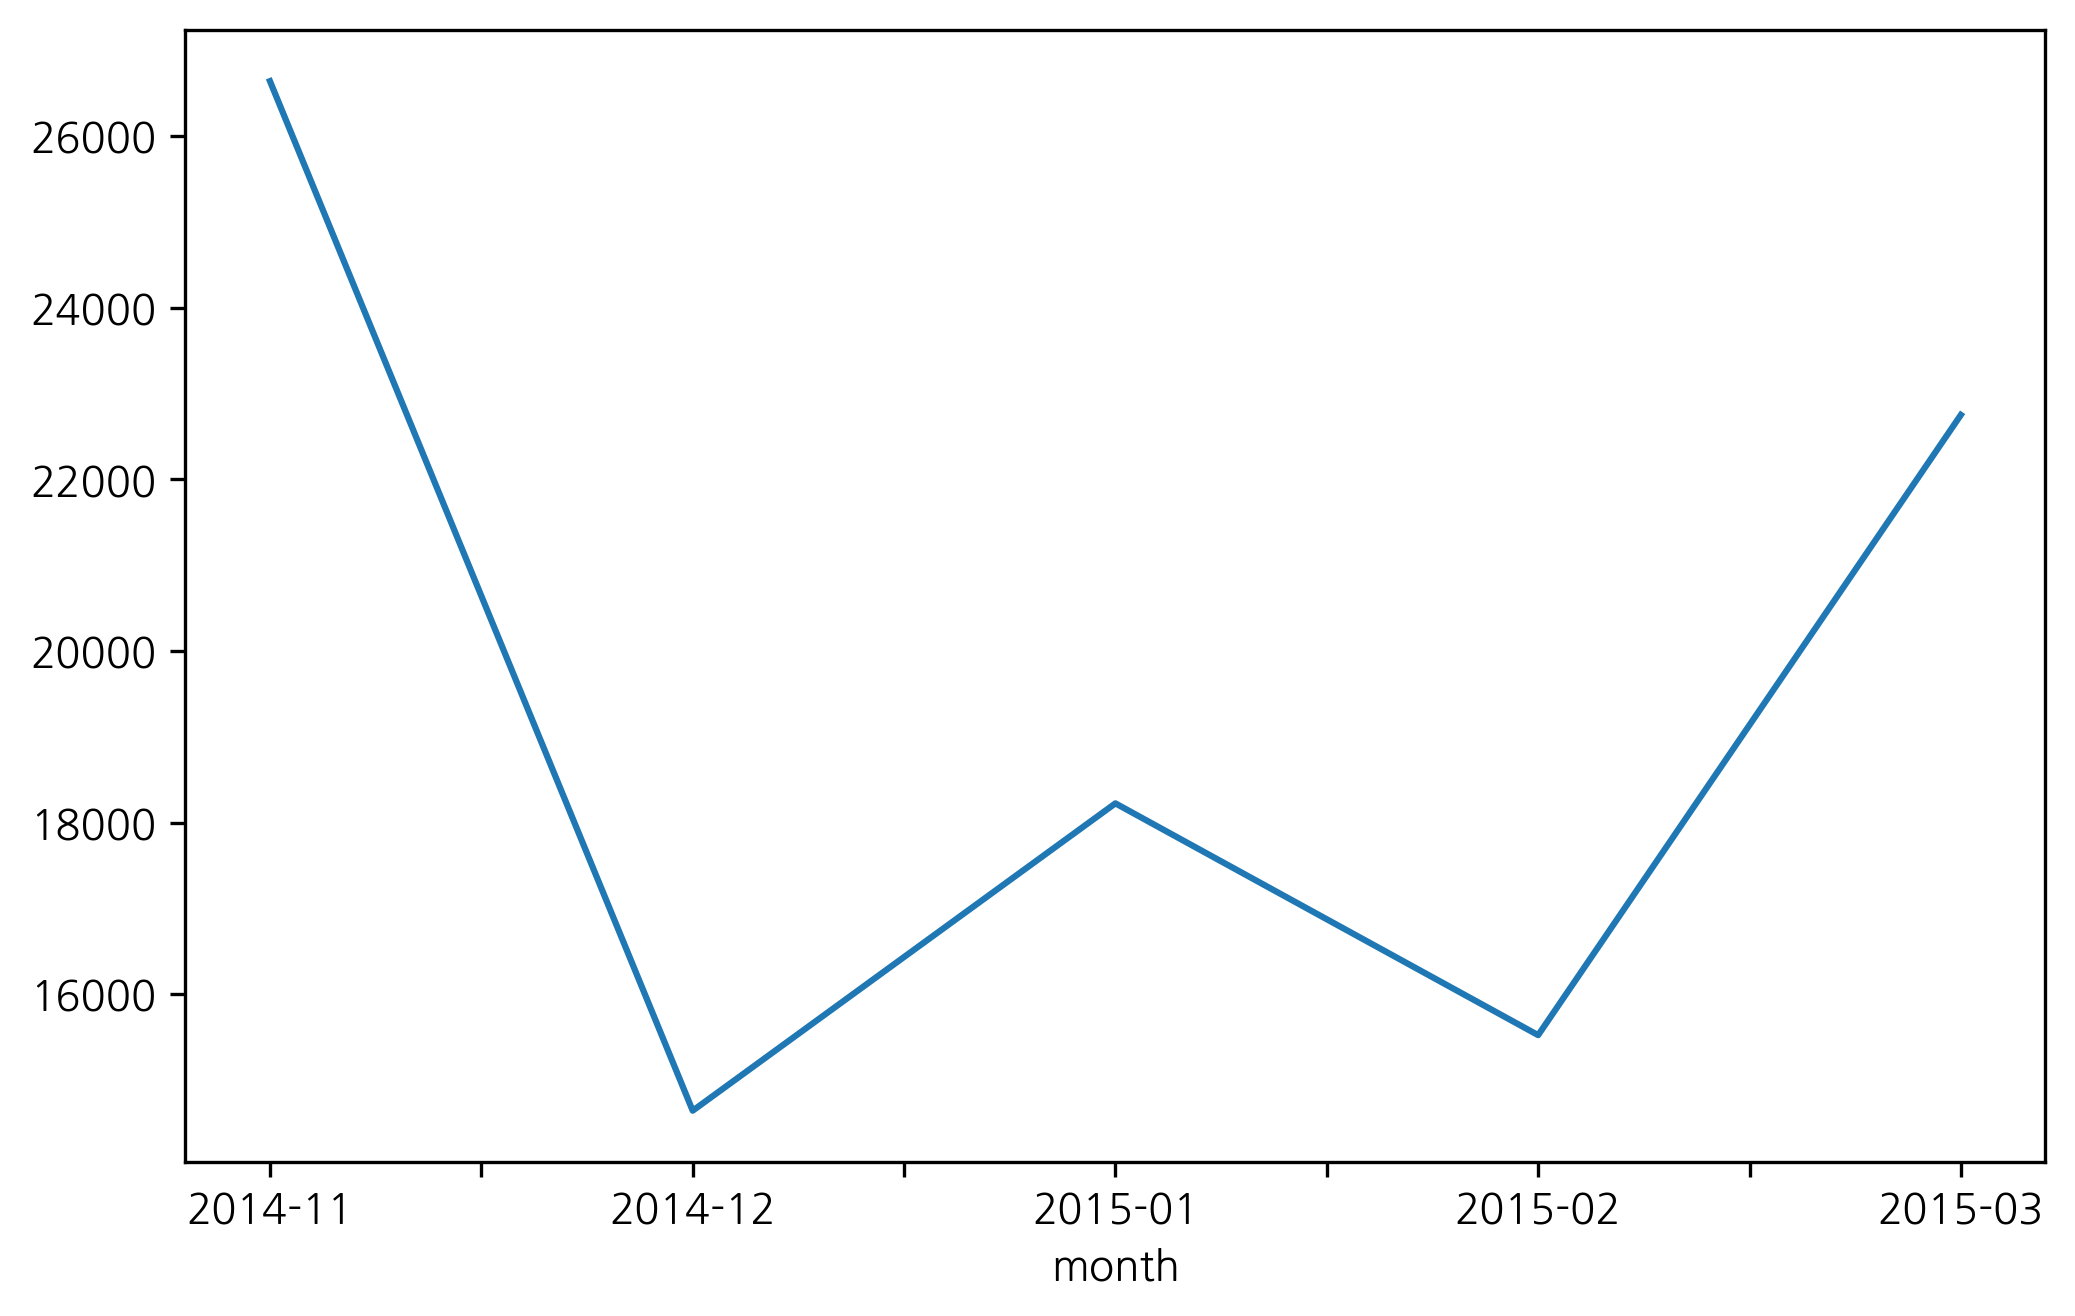

In [98]:
df_phone.groupby('month')['duration'].sum().plot()

<AxesSubplot:xlabel='month'>

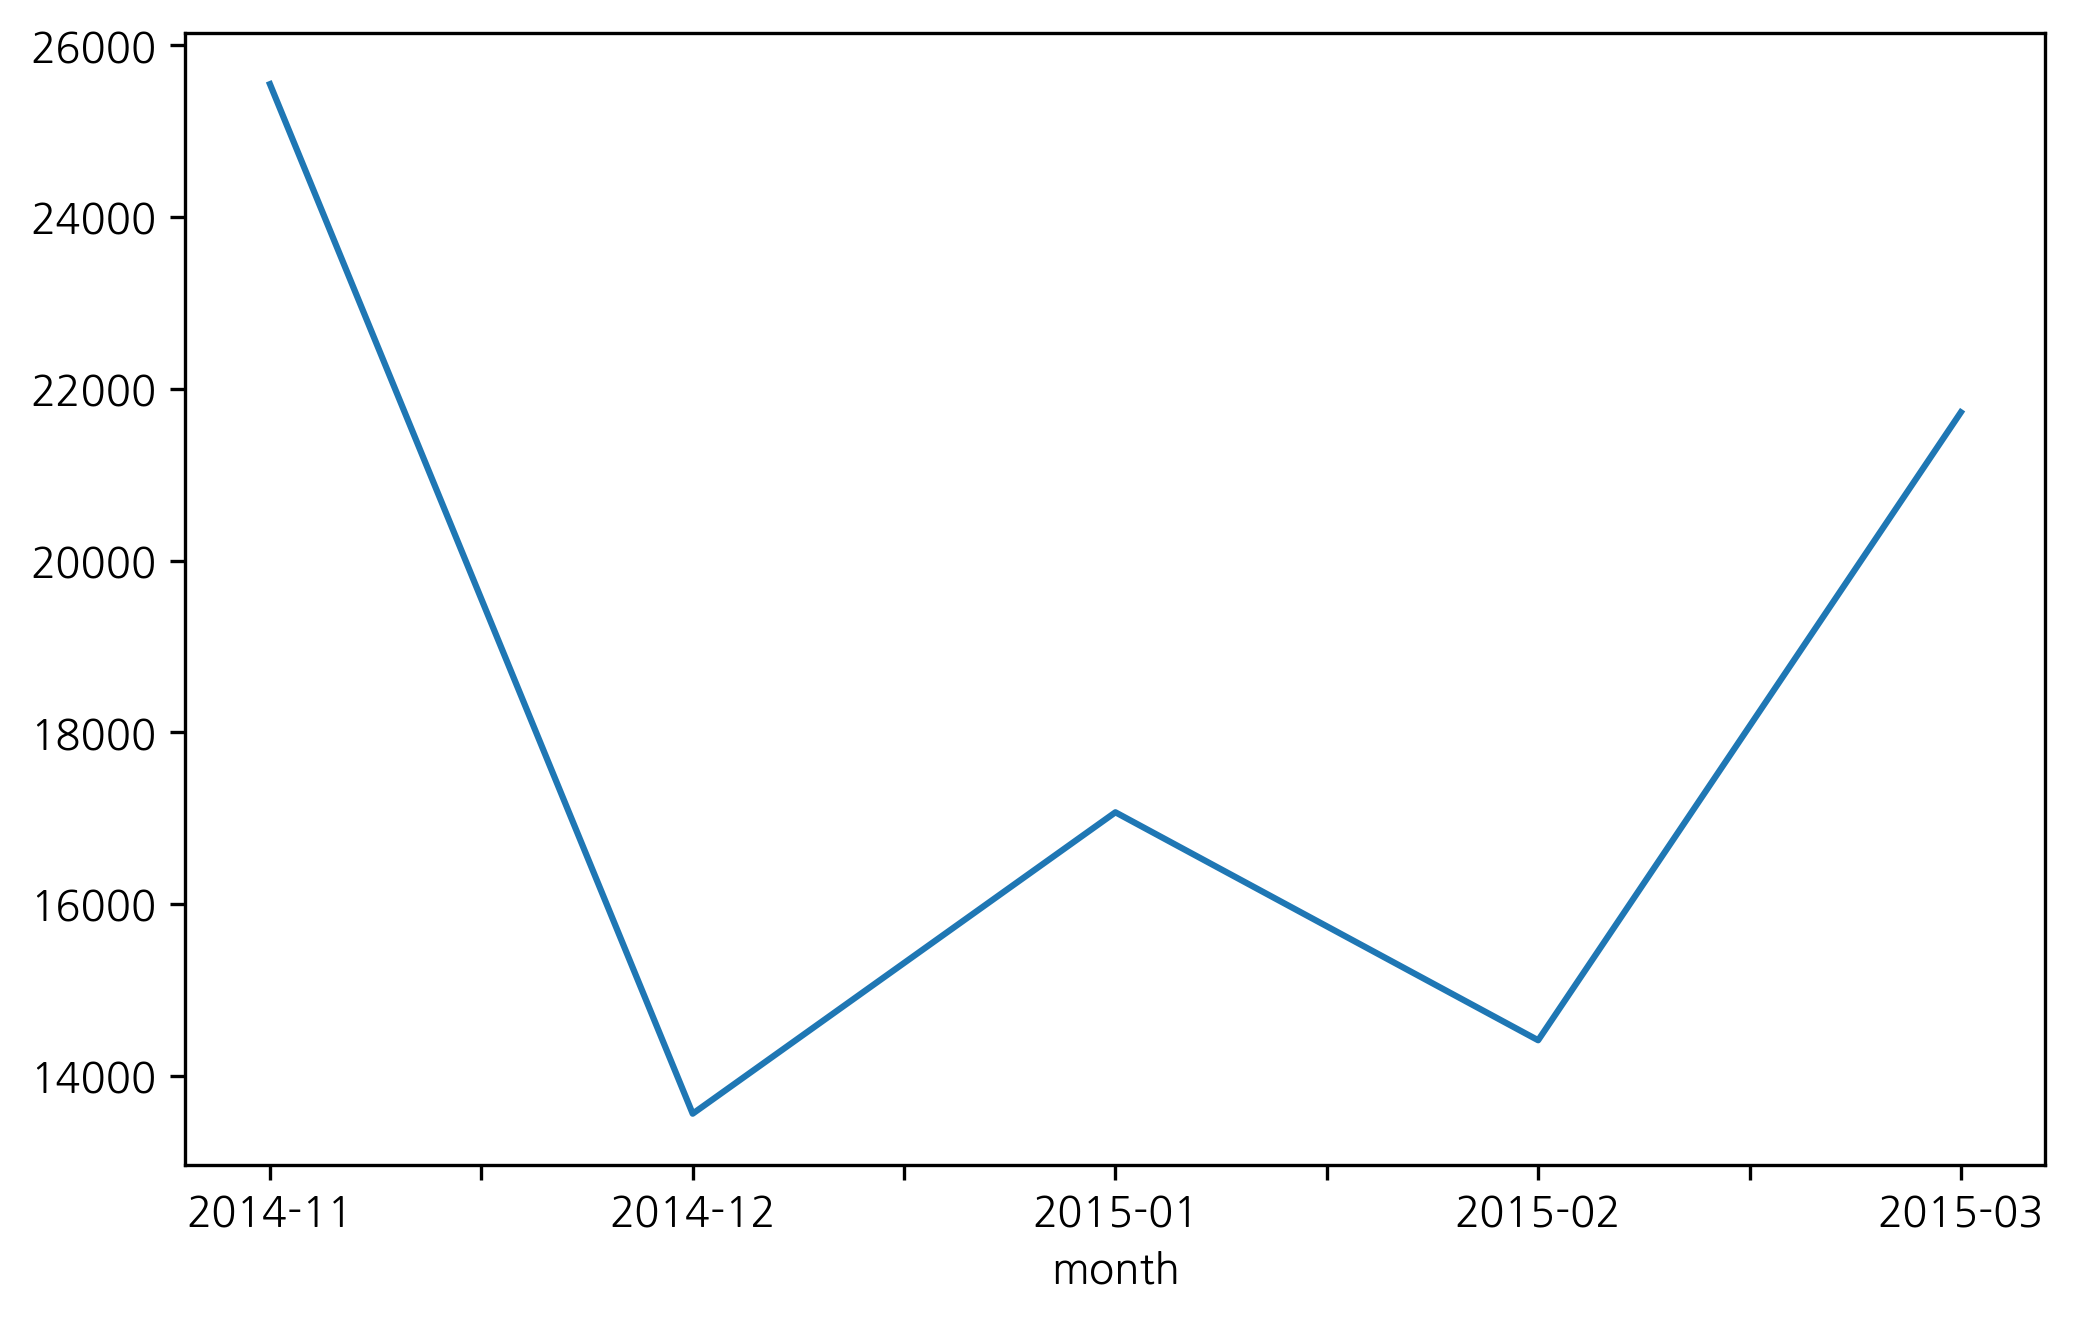

In [99]:
df_phone[df_phone['item'] == 'call'].groupby('month')['duration'].sum().plot()

<AxesSubplot:xlabel='month'>

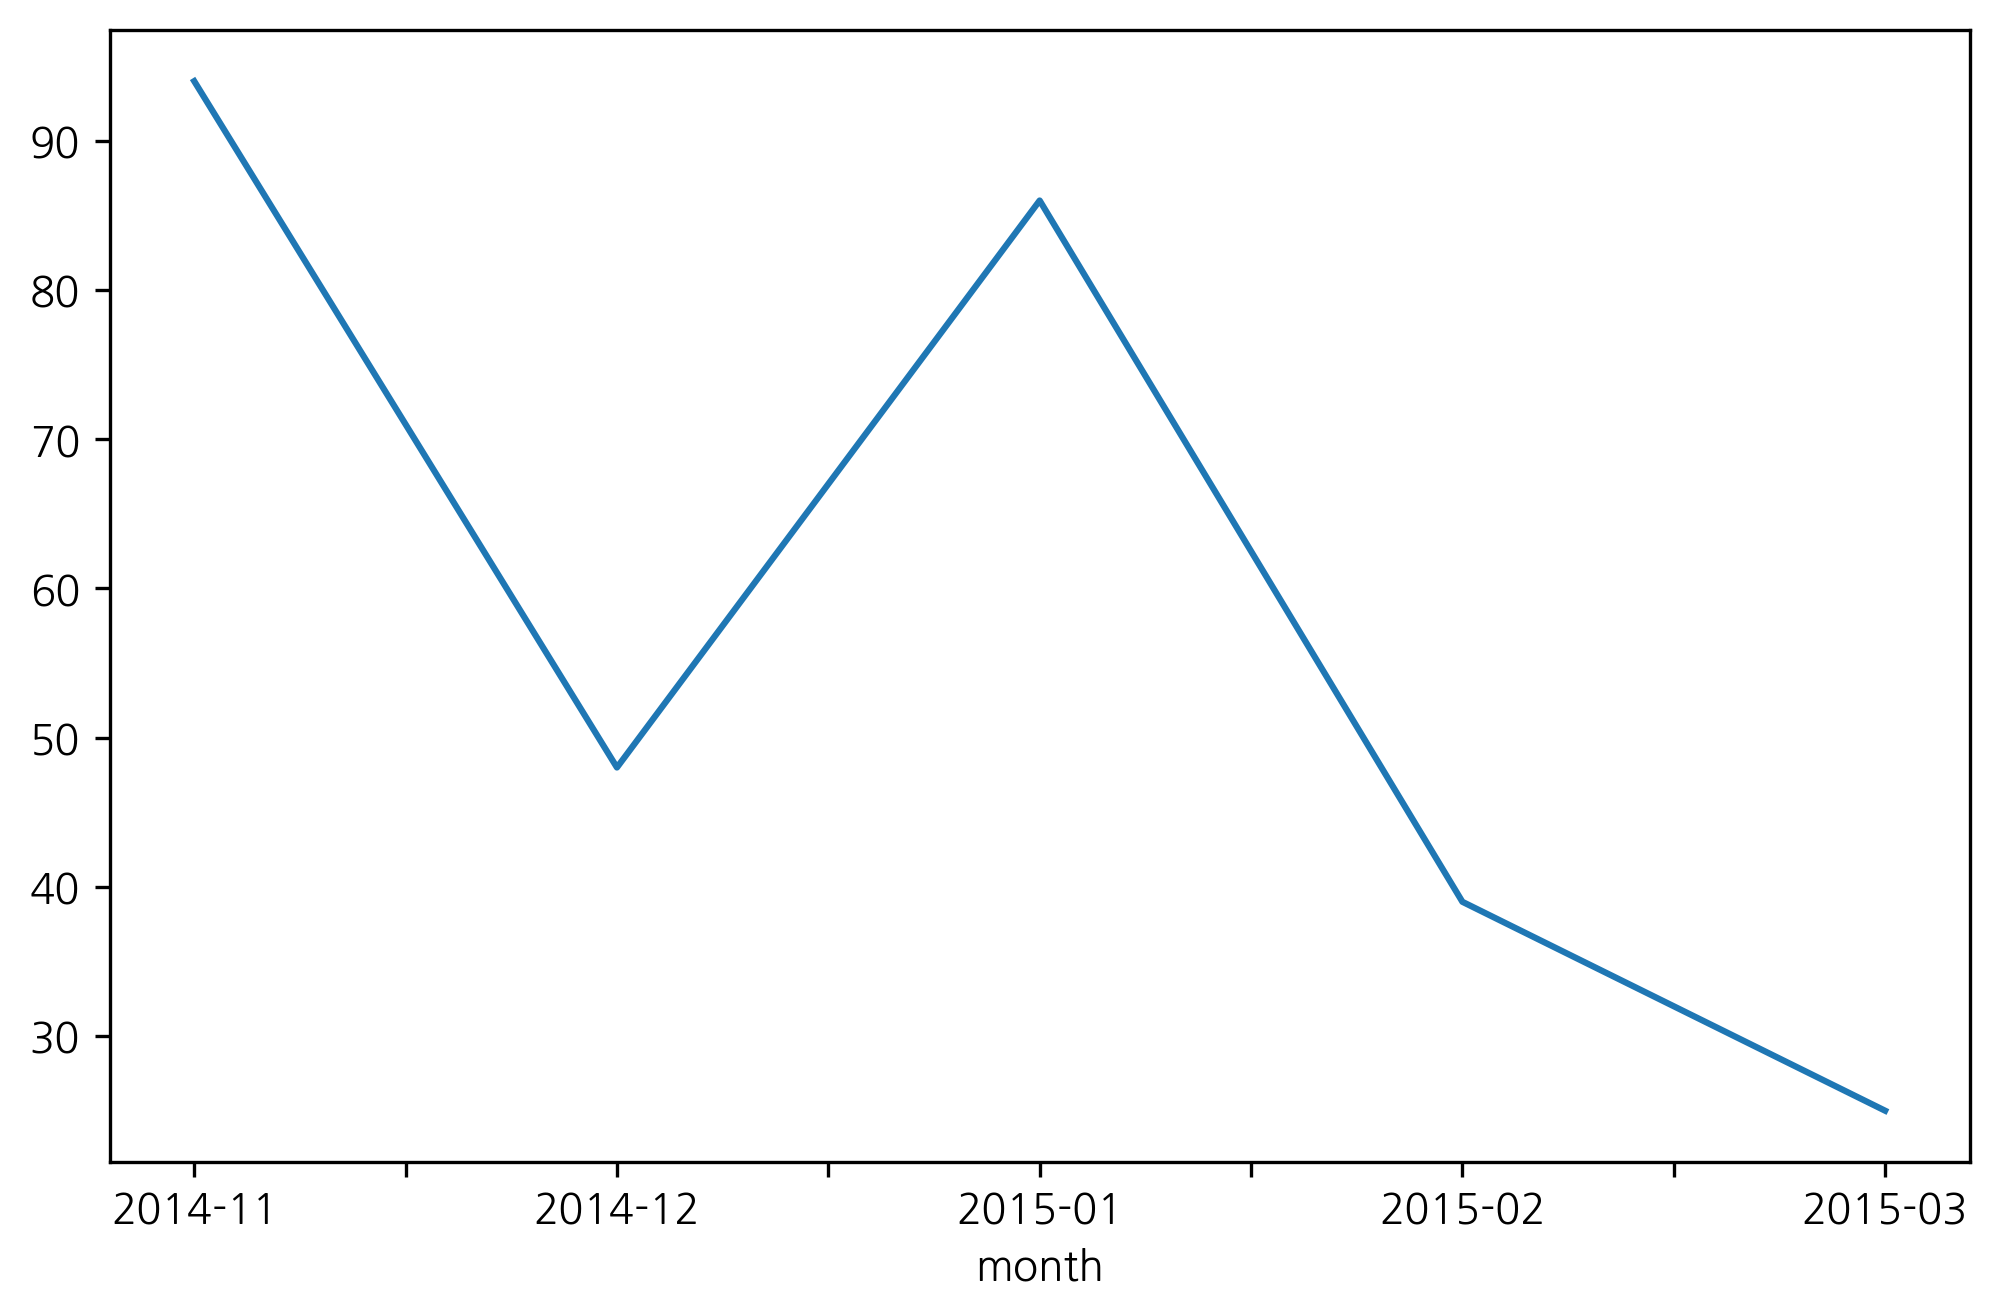

In [100]:
df_phone[df_phone['item'] == 'sms'].groupby('month')['duration'].sum().plot()

In [103]:
df_phone.groupby(['month', 'item'])['duration'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: duration, dtype: int64

In [104]:
df_phone.groupby(['month', 'item'])['duration'].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


<AxesSubplot:xlabel='month'>

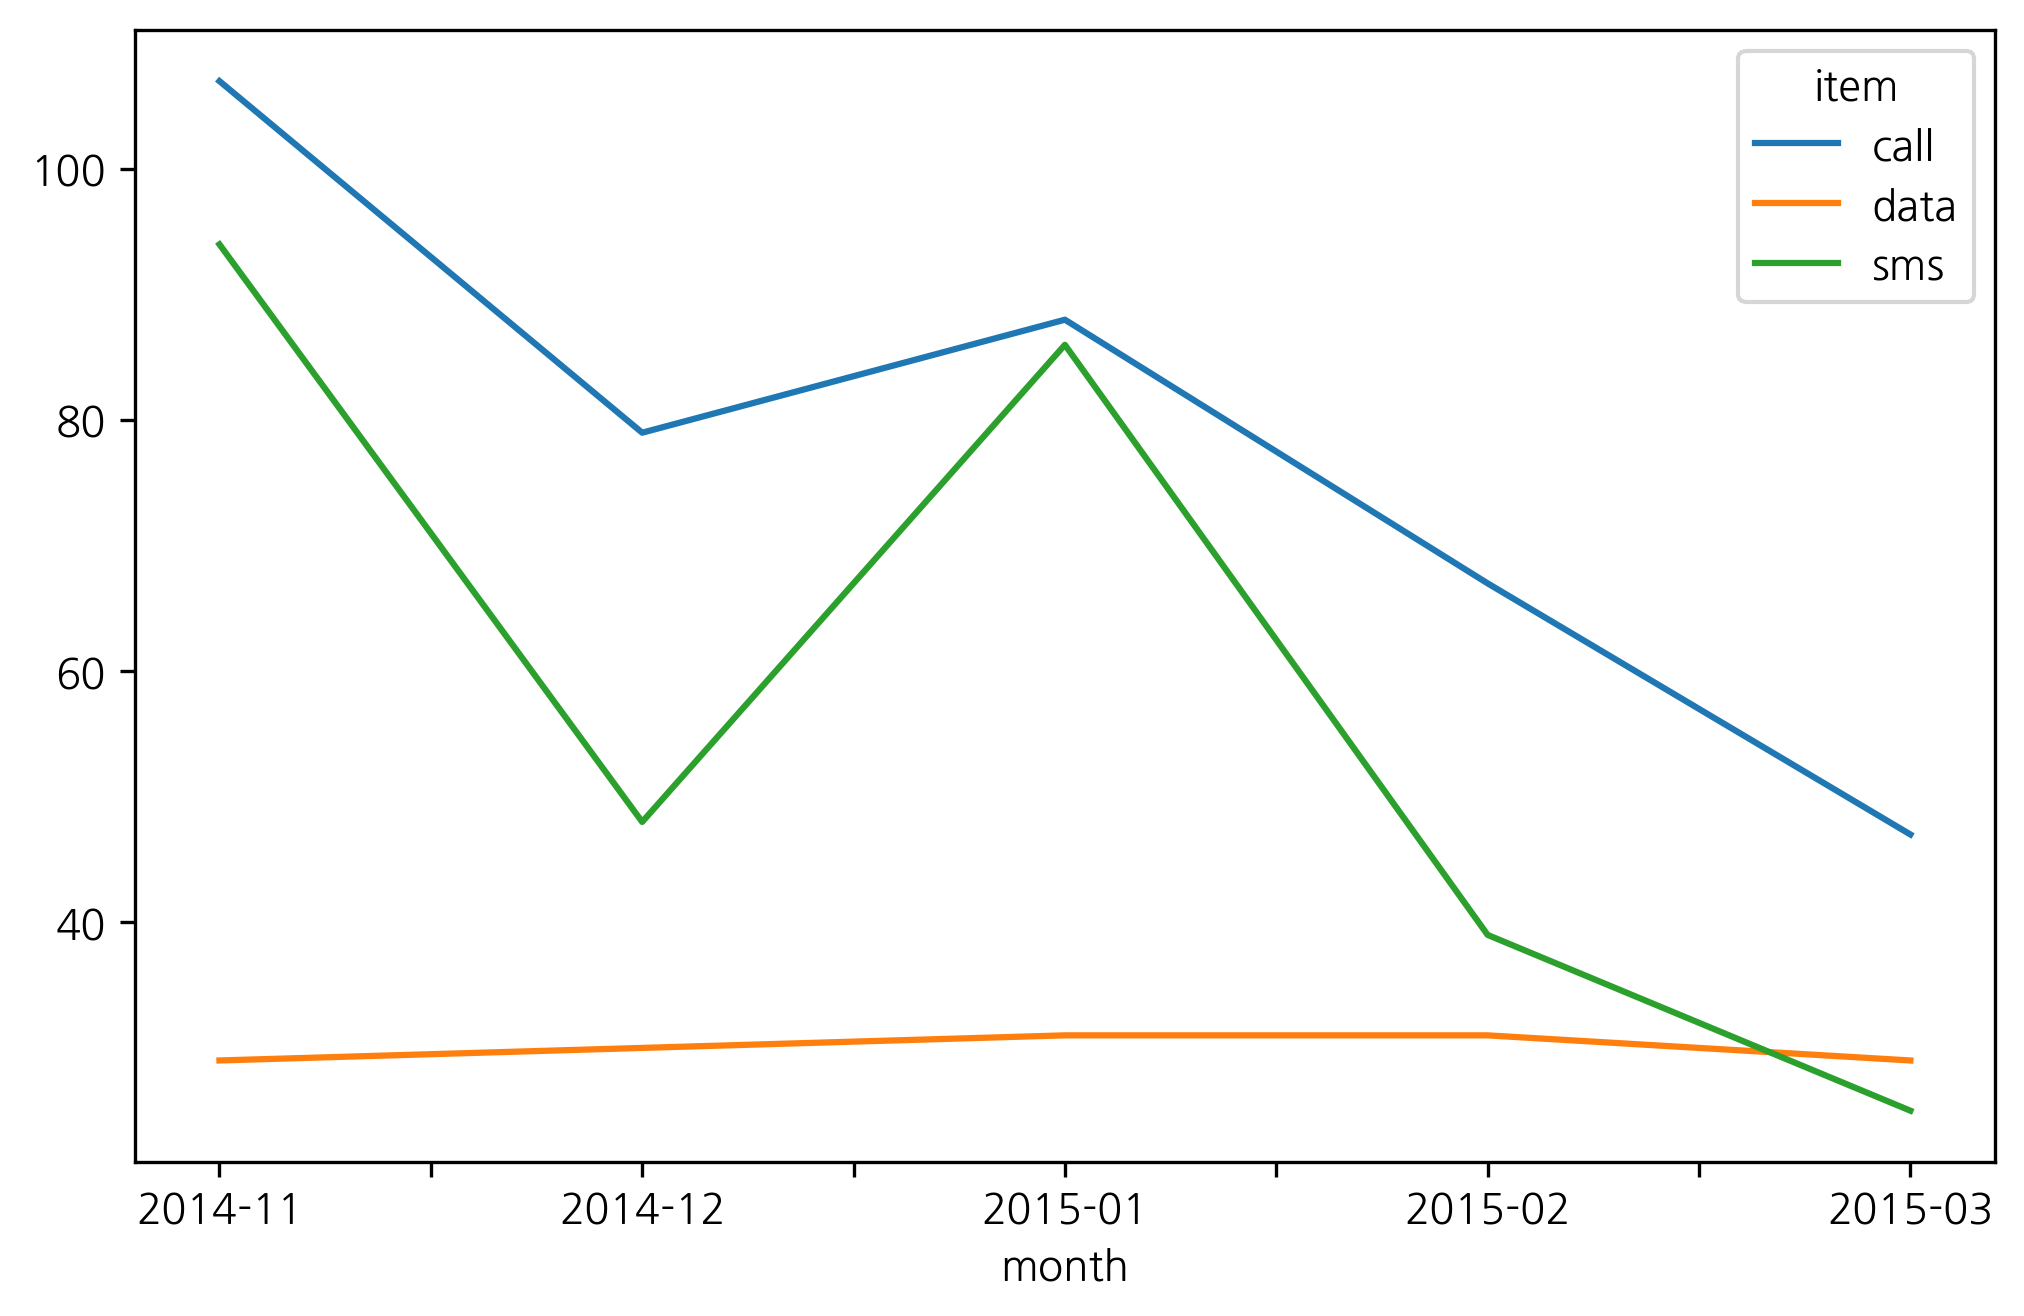

In [105]:
df_phone.groupby(['month', 'item'])['duration'].count().unstack().plot()

In [107]:
list(df_phone.groupby('month', as_index = False))

[('2014-11',
       index                date  duration  item    month   network network_type
  0        0 2014-10-15 06:58:00    34.429  data  2014-11      data         data
  1        1 2014-10-15 06:58:00    13.000  call  2014-11  Vodafone       mobile
  2        2 2014-10-15 14:46:00    23.000  call  2014-11    Meteor       mobile
  3        3 2014-10-15 14:48:00     4.000  call  2014-11     Tesco       mobile
  4        4 2014-10-15 17:27:00     4.000  call  2014-11     Tesco       mobile
  ..     ...                 ...       ...   ...      ...       ...          ...
  225    225 2014-11-12 19:18:00     1.000   sms  2014-11     Three       mobile
  226    226 2014-11-12 19:18:00     1.000   sms  2014-11     Three       mobile
  227    227 2014-11-12 19:20:00     1.000   sms  2014-11  Vodafone       mobile
  229    229 2014-11-13 22:30:00     1.000   sms  2014-11     Three       mobile
  230    230 2014-11-13 22:31:00     1.000   sms  2014-11  Vodafone       mobile
  
  [230 rows 

In [108]:
df_phone.groupby('month', as_index = False).agg({'duration' : 'sum'})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [113]:
df_phone.groupby('month').agg({'duration' : 'sum'})

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


In [114]:
df_phone.groupby('month').agg({'duration' : 'sum'}).reset_index()

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [111]:
df_phone.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [112]:
df_phone.groupby('month', as_index=False)['duration'].sum()

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [116]:
df_phone.groupby(['month', 'item']).agg(
{'duration': 'sum',
'network_type': 'count',
'date':'first'})

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [117]:
df_phone.groupby(['month', 'item']).agg(
{'duration': [min, max, sum],
'network_type': 'count',
'date':['min', 'first', 'nunique']})

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

In [125]:
grouped = df_phone.groupby('month').agg(
{'duration': [min, max, np.mean]})

In [126]:
grouped

duration                     
             min      max        mean
month                                
2014-11      1.0   1940.0  115.823657
2014-12      1.0   2120.0   93.260318
2015-01      1.0   1859.0   88.894141
2015-02      1.0   1863.0  113.301453
2015-03      1.0  10528.0  225.251891

In [127]:
grouped.columns = grouped.columns.droplevel(level=0)

In [128]:
grouped

,min,max,mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [129]:
grouped.rename(columns = {'min' : 'min_duration', 'max': 'max_duration', 'mean': 'mean_duration'})

,min_duration,max_duration,mean_duration
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [130]:
grouped

,min,max,mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [131]:
grouped.add_prefix('duration_')

,duration_min,duration_max,duration_mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [135]:
df_phone.pivot_table(['duration'],
                    index = [df_phone.month, df_phone.item],
                    columns = df_phone.network, aggfunc='sum', fill_value = 0)

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

In [145]:
list(df_phone.groupby(['month', 'item'])['duration'])

[(('2014-11', 'call'),
  1        13.0
  2        23.0
  3         4.0
  4         4.0
  5         4.0
          ...  
  203      36.0
  216       4.0
  222     145.0
  223    1001.0
  224       7.0
  Name: duration, Length: 107, dtype: float64),
 (('2014-11', 'data'),
  0      34.429
  6      34.429
  13     34.429
  26     34.429
  39     34.429
  45     34.429
  54     34.429
  56     34.429
  58     34.429
  66     34.429
  80     34.429
  81     34.429
  87     34.429
  92     34.429
  95     34.429
  97     34.429
  101    34.429
  111    34.429
  114    34.429
  120    34.429
  131    34.429
  151    34.429
  159    34.429
  170    34.429
  182    34.429
  189    34.429
  192    34.429
  199    34.429
  208    34.429
  Name: duration, dtype: float64),
 (('2014-11', 'sms'),
  11     1.0
  12     1.0
  14     1.0
  15     1.0
  16     1.0
        ... 
  225    1.0
  226    1.0
  227    1.0
  229    1.0
  230    1.0
  Name: duration, Length: 94, dtype: float64),
 (('2014-12', 'call

In [153]:
df_phone[df_phone['network'] == 'Meteor']['duration'].sum()

7233.0

In [155]:
1521/7233

0.21028618830360846

In [136]:
df_phone.pivot_table(['duration'],
                    index = [df_phone.month, df_phone.item],
                    columns = df_phone.network, aggfunc='mean', fill_value = 0)

duration                                              \
network           Meteor       Tesco       Three    Vodafone    data   
month   item                                                           
2014-11 call  117.000000  202.250000  319.435897  179.833333   0.000   
        data    0.000000    0.000000    0.000000    0.000000  34.429   
        sms     1.000000    1.000000    1.000000    1.000000   0.000   
2014-12 call  167.500000  151.583333  210.533333  130.200000   0.000   
        data    0.000000    0.000000    0.000000    0.000000  34.429   
        sms     1.000000    1.000000    1.000000    1.000000   0.000   
2015-01 call  105.095238  242.000000  247.884615  241.733333   0.000   
        data    0.000000    0.000000    0.000000    0.000000  34.429   
        sms     1.000000    1.000000    1.000000    1.000000   0.000   
2015-02 call  297.000000  204.350000  285.409091  266.285714   0.000   
        data    0.000000    0.000000    0.000000    0.000000  34.429   
        sms     1.000000    1.000000    1.000000    1.000000   0.000   
2015-03 call   68.500000  139.000000  451.454545  351.300000   0.000   
        data    0.000000    0.000000    0.000000    0.000000  34.429   
        sms     0.000000    1.000000    1.000000    1.000000   0.000   

                                                    
network          landline special  voicemail world  
month   item                                        
2014-11 call   581.200000       0  50.166667     0  
        data     0.000000       0   0.000000     0  
        sms      0.000000       1   0.000000     0  
2014-12 call   203.428571       0  86.250000     0  
        data     0.000000       0   0.000000     0  
        sms      0.000000       0   0.000000     1  
2015-01 call   145.727273       0  95.000000     0  
        data     0.000000       0   0.000000     0  
        sms      0.000000       0   0.000000     0  
2015-02 call    91.250000       0  44.666667     0  
        data     0.000000       0   0.000000     0  
        sms      0.000000       1   0.000000     0  
2015-03 call  1070.000000       0  57.750000     0  
        data     0.000000       0   0.000000     0  
        sms      0.000000       0   0.000000     1

In [137]:
df_phone.pivot_table(['duration'],
                    index = [df_phone.month, df_phone.item],
                    columns = df_phone.network, aggfunc='count', fill_value = 0)

duration                                                       \
network        Meteor Tesco Three Vodafone data landline special voicemail   
month   item                                                                 
2014-11 call       13    20    39       24    0        5       0         6   
        data        0     0     0        0   29        0       0         0   
        sms        10     3    25       55    0        0       1         0   
2014-12 call       12    12    30       10    0        7       0         8   
        data        0     0     0        0   30        0       0         0   
        sms        12     1    13       18    0        0       0         0   
2015-01 call       21    12    26       15    0       11       0         3   
        data        0     0     0        0   31        0       0         0   
        sms        10     3    33       40    0        0       0         0   
2015-02 call        4    20    22        7    0        8       0         6   
        data        0     0     0        0   31        0       0         0   
        sms         1     2    11       23    0        0       2         0   
2015-03 call        4     7    11       10    0       11       0         4   
        data        0     0     0        0   29        0       0         0   
        sms         0     4     5       13    0        0       0         0   

                    
network      world  
month   item        
2014-11 call     0  
        data     0  
        sms      0  
2014-12 call     0  
        data     0  
        sms      4  
2015-01 call     0  
        data     0  
        sms      0  
2015-02 call     0  
        data     0  
        sms      0  
2015-03 call     0  
        data     0  
        sms      3

In [158]:
df_phone.groupby(['month', 'item', 'network'])['duration'].sum().unstack()

network       Meteor   Tesco    Three  Vodafone      data  landline  special  \
month   item                                                                   
2014-11 call  1521.0  4045.0  12458.0    4316.0       NaN    2906.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms     10.0     3.0     25.0      55.0       NaN       NaN      1.0   
2014-12 call  2010.0  1819.0   6316.0    1302.0       NaN    1424.0      NaN   
        data     NaN     NaN      NaN       NaN  1032.870       NaN      NaN   
        sms     12.0     1.0     13.0      18.0       NaN       NaN      NaN   
2015-01 call  2207.0  2904.0   6445.0    3626.0       NaN    1603.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms     10.0     3.0     33.0      40.0       NaN       NaN      NaN   
2015-02 call  1188.0  4087.0   6279.0    1864.0       NaN     730.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms      1.0     2.0     11.0      23.0       NaN       NaN      2.0   
2015-03 call   274.0   973.0   4966.0    3513.0       NaN   11770.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms      NaN     4.0      5.0      13.0       NaN       NaN      NaN   

network       voicemail  world  
month   item                    
2014-11 call      301.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2014-12 call      690.0    NaN  
        data        NaN    NaN  
        sms         NaN    4.0  
2015-01 call      285.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-02 call      268.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-03 call      231.0    NaN  
        data        NaN    NaN  
        sms         NaN    3.0

In [ ]:
df_movie = pd.read_csv('./movie_rating.csv')
df_movie.head()

In [ ]:
pd.crosstab(index=df.movie.critic, columns = df_movie.title, values = df_movie.rating, aggfunc='first').fillna(0)

In [3]:
raw_data = {
    'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
    'test_score': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]
}
df_a = pd.DataFrame(raw_data, columns=['subject_id', 'test_score'])
df_a

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [4]:
raw_data = {
    'subject_id': ['4', '5', '6', '7', '8'],
    'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
    'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan'],
}
df_b = pd.DataFrame(raw_data)
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [5]:
pd.merge(df_a, df_b, on='subject_id')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [6]:
pd.merge(df_a, df_b, left_on='subject_id', right_on='subject_id')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [8]:
pd.merge(df_a, df_b, on='subject_id', how='left')

,subject_id,test_score,first_name,last_name
0,1,51,NaN,NaN
1,2,15,NaN,NaN
2,3,15,NaN,NaN
3,4,61,Billy,Bonder
4,5,16,Brian,Black
5,7,14,Bryce,Brice
6,8,15,Betty,Btisan
7,9,1,NaN,NaN
8,10,61,NaN,NaN
9,11,16,NaN,NaN


In [9]:
pd.merge(df_a, df_b, on='subject_id', how='right')

,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,6,NaN,Bran,Balwner
3,7,14.0,Bryce,Brice
4,8,15.0,Betty,Btisan


In [10]:
pd.merge(df_a, df_b, on='subject_id', how='inner')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [11]:
pd.merge(df_a, df_b, on='subject_id', how='outer')

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,15.0,Betty,Btisan
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


In [12]:
pd.merge(df_a, df_b, right_index=True, left_index=True)

,subject_id_x,test_score,subject_id_y,first_name,last_name
0,1,51,4,Billy,Bonder
1,2,15,5,Brian,Black
2,3,15,6,Bran,Balwner
3,4,61,7,Bryce,Brice
4,5,16,8,Betty,Btisan


In [13]:
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [14]:
raw_data = {
    'subject_id': ['1', '2', '3', '4', '5'],
    'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
    'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches'],
}
df_a = pd.DataFrame(raw_data)
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [15]:
df_new = pd.concat([df_a, df_b])

In [16]:
df_new

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [17]:
df_new.reset_index()

,index,subject_id,first_name,last_name
0,0,1,Alex,Anderson
1,1,2,Amy,Ackerman
2,2,3,Allen,Ali
3,3,4,Alice,Aoni
4,4,5,Ayoung,Atiches
5,0,4,Billy,Bonder
6,1,5,Brian,Black
7,2,6,Bran,Balwner
8,3,7,Bryce,Brice
9,4,8,Betty,Btisan


In [18]:
df_new.reset_index(drop=True)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


In [19]:
df_a.append(df_b)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [20]:
df_a.append(df_b).reset_index(drop=True)

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


In [22]:
df_new = pd.concat([df_a, df_b], axis = 1)
df_new

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [24]:
df_new.reset_index(drop=True)

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [25]:
import os